# 导入必要的库

我们需要导入一个叫 [captcha](https://github.com/lepture/captcha/) 的库来生成验证码。

我们生成验证码的字符由数字和大写字母组成。

In [4]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.models import load_model

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import string
characters = string.ascii_uppercase
undistinct = 'CKOPSVZ'
chars = characters
for i in characters:
    if i not in undistinct:
        chars += i.lower()
print(chars)

width, height, n_len, n_class = 130, 53, 4, len(chars)
path = os.getcwd() + '/sample3'
print path

Using TensorFlow backend.


ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghijlmnqrtuwxy
/home/z/gtest/captcha_break/sample3


In [2]:
root, dirs, files = os.walk(path).next()

def getAllImages(path):
    cnt = len(files)
    X = np.zeros((cnt, height, width, 1), dtype=np.uint8)
    y = []
    for i, j in enumerate(files):
        #X[i] = cv2.imread(root+'/'+j)
        img = cv2.imread(root+'/'+j)
        blur = cv2.bilateralFilter(img, 9, 75, 75)
        grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X[i] = grayimg.reshape((height, width, 1))
        y.append(j[:4])
    return X, y

allX, ally = getAllImages(path)

In [3]:
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([chars[x] for x in y])

# import result

In [5]:
model = load_model('mycnn.h5')

# test gen

In [6]:
test_path = os.getcwd() + '/sample_test'
root, dirs, files = os.walk(test_path).next()

testallX, testally = getAllImages(test_path)

def gen_test(batch_size=8):
    X = np.zeros((batch_size, height, width, 1), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    cnt = 0
    while True:
        for i in range(batch_size):
            X[i] = testallX[cnt]
            for j, ch in enumerate(testally[cnt]):
                y[j][i, :] = 0
                y[j][i, chars.find(ch)] = 1
            if cnt >= len(files) - 1:
                cnt = 0
            else:
                cnt += 1
        yield X, y

In [7]:
a = gen_test(1)

# predict

(-0.5, 129.5, 52.5, -0.5)

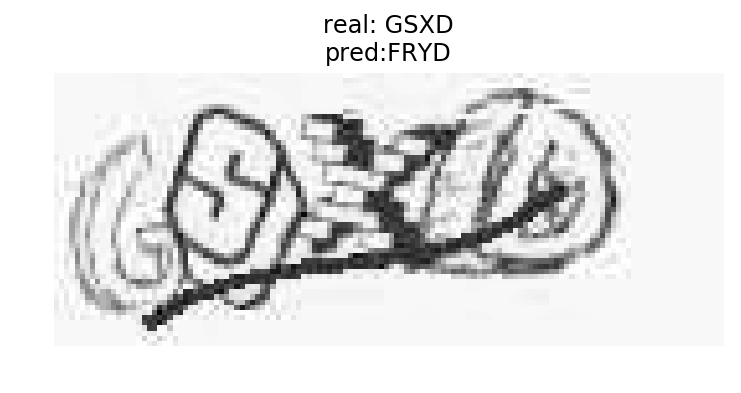

In [11]:
X, y = a.next()
y_pred = model.predict(X)
plt.title('real: %s\npred:%s'%(decode(y), decode(y_pred)))
plt.imshow(X[0].reshape((height, width)), cmap='gray')
plt.axis('off')